# Artificial Neural Networks (ANNs) 

- ANNs is inspired by  the networks of bilogical neurons found in human brains. 
- ANNs are at the very core of Deep Learning.
- ANNs are versatile, powerfull, and scalable. 
- ANNs frequently outperform other ML techniques on very large and complex problems.

## Biological Neurons
- Biological neuron is an unusual-looking cell mostly found in anamial brains. 
- Composed of a cell body conatining the necleus and most of the cell's complex componentsy, many branching extensions called denfrites, plus one very long extension called axon.
- This individual biological neurons behave in such a way that they organize in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants

<img src="images/Biological Neurons.png" style="width: 500px;">


### Logical Computations with Neurons

It has one or more binary (on/off) inpus and one binary output. The artidicial neuron activates its output when more than a certain number of its inputs are active. 
<img src="images/ANNs performing simple logical computations.png" style="width: 400px;">
- The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.
-  The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).
- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).
- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.


In [1]:
import numpy as np
import sklearn
import tensorflow as tf
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)
Colors = ['#004165','#dc4200',  '#69be28', '#f0be00', '#0cc6de', '#bed600', '#006983', '2b580c', '639a67']

Project_Root_Directory = "."
Section_Id             = "ANN"
Images_Path            = os.path.join(Project_Root_Directory, "images", Section_Id)
os.makedirs(Images_Path, exist_ok =True)



# Perceptrons

- Perceptron is one of the simplest ANN architectures.
- It is based on a slightly different artificial neuron called a threshold logic unit (TLU) or linear threshold unit (LTU). 
    - The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. 
    - The TLU computs a weighted sum of its inpyt : $z = w_1x_1 + w_2x_2 + \dots + w_nx_n  = x^Tw$ , then applies a step function to that sum and outputs the rsult:

$$ h_w(x) = step (z),
$$
where $z= x^T w $.
- The most common step function used in Perceptrons is the Heaviside step function.
- A single TLU can be used for simple linear binary classification.
- Training a TLU in this case means finding the right values for $w_0$, $w_1$, and $w_2$. 
- A Perceptron is simply composed of a single layer of TLUs with each TLU connected to all the inputs.
    - When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a dense layer. 
    - The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. 
    - Moreover, an extra bias feature is generally added (x_0 = 1): it is typically represented using a special type of neuron called a bias neuron, which out‐puts 1 all the time.
- Computing the outputs of a fully connected layer:
$$ h_{W,b}(X) =  \phi(XW +b),
$$
    * X represents the matrix of input features,
    * W is weight matrix contains all the connection weight except fot the ones from the bias neuron. 
    * b is bias vector containing all the connection weights between the bias neuron and the artificial neurons. One bias term per artificial neuron.
    * $\phi$ is activation function. When the artificial neurons are TLUs, it is a step function. 

MovieWriter imagemagick unavailable; using Pillow instead.


[7, 10, 0, 18, 3, 6, 14, 9, 7, 17, 0, 19, 3, 2, 12, 6, 11, 7]


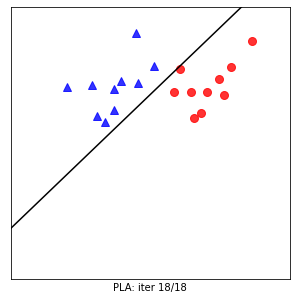

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)


def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 

                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(m)
# print(w)
# print(len(w))

def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')


## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d_2(w):
    it = len(w)    
    fig, ax = plt.subplots(figsize=(5, 5))  
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save 
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()
    
viz_alg_1d_2(w)

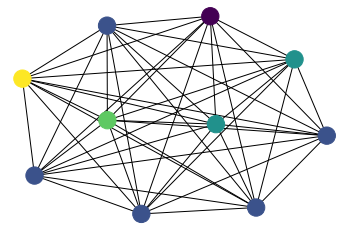

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter

# number of nodes
size = 10

# generate graph
G=nx.complete_graph(size)

frame = np.random.randint(0, 5, (size, size)) # random ndarray between 0 and 5, length and number of frames = number of nodes in the graph

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G,pos)
edges = nx.draw_networkx_edges(G,pos)
plt.axis('off')

def update(i):
    nc = frame[i] # np.random.randint(2, size=200)
    nodes.set_array(nc)
    return nodes,

# output animation; its important I save it
fig = plt.gcf()
ani = FuncAnimation(fig, update, interval=50, frames=range(size), blit=True)
plt.show()

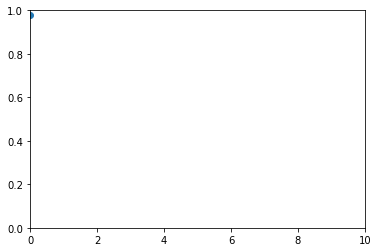

MovieWriter PillowWriter unavailable; using Pillow instead.


In [16]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np


# create figure object
fig = plt.figure()
# load axis box
ax = plt.axes()
# set axis limit
ax.set_ylim(0, 1)
ax.set_xlim(0, 10)

camera = Camera(fig)
for i in range(10):
    ax.scatter(i, np.random.random())
    plt.pause(0.1)
    camera.snap()

animation = camera.animate()
animation.save('animation.gif', writer='PillowWriter', fps=2)

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron 
# Scikit-Learn provides a Perceptron class that implements a single-TLU network
# the Perceptron learning algorithm strongly resembles Stochastic Gradient Descent
# Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: 
# loss="perceptron",
# learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

iris =load_iris()
X    = iris.data[:, (2,3)]  # Extract petal length and petal width data
y    = (iris.target ==0).astype(np.int)

per_clf  = Perceptron(max_iter =1000, tol = 1e-3, random_state =42)
per_clf.fit(X,y)

y_pred = per_classification.predict([[2, 0.5]])
print(y_pred)

[1]


In [3]:
coefs     = -per_classification.coef_[0][0] / per_classification.coef_[0][1]
intercept = -per_classification.intercept_ / per_classification.coef_[0][1]

axes = [0,5,0,2]

x0,x1  =  np.meshgrid(  np.linspace(axes[0], axes[1], 500).reshape(-1,1),
                        np.linspace(axes[0],axes[1], 500).reshape(-1,1), )

X_new  = np.c_[x0.ravel(), x1.ravel()]
y_pred = per_classification.predict(X_new)
z      = y_pred.reshape(x0.shape)

# plotting
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap([ "#DE3163",  "#FFBF00"   ])

plt.figure(figsize =(10,5))
plt.plot(X[y==0, 0], X[y == 0,1], "bs", label = "Something else")
plt.plot(X[y==1, 0], X[y == 1,1], "g^", label = "Iris-Setosa", markersize=10)

plt.plot([axes[0], axes[1]], [coefs * axes[0] + intercept, coefs * axes[1] + intercept], "k-", linewidth=3) #line y= ax+b

plt.contourf(x0, x1, z, cmap=custom_cmap, alpha =.3)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

#  Activating functions

In [5]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

def relu(z):
    return np.maximum(0,x)

def derivative(f, x, eps = 1e-6):
    return (f(x + eps) - f(x - eps))/(2 * eps)

def heaviside(x):
    return (x >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

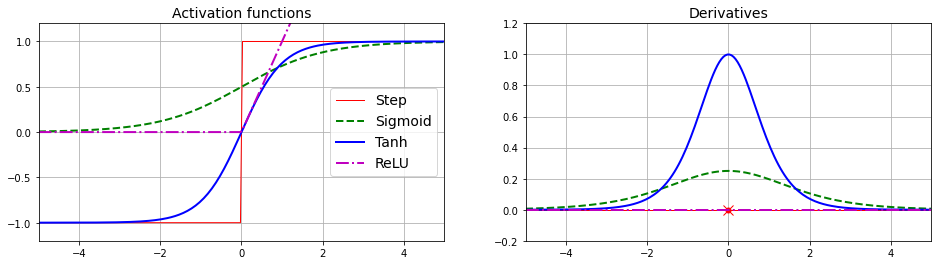

In [6]:
x = np.linspace(-5, 5, 200)

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.plot(x, np.sign(x), "r-", linewidth=1, label="Step")
plt.plot(x, sigmoid(x), "g--", linewidth=2, label="Sigmoid")
plt.plot(x, np.tanh(x), "b-", linewidth=2, label="Tanh")
plt.plot(x, relu(x), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(x, derivative(np.sign, x), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(x, derivative(sigmoid, x), "g--", linewidth=2, label="Sigmoid")
plt.plot(x, derivative(np.tanh, x), "b-", linewidth=2, label="Tanh")
plt.plot(x, derivative(relu, x), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

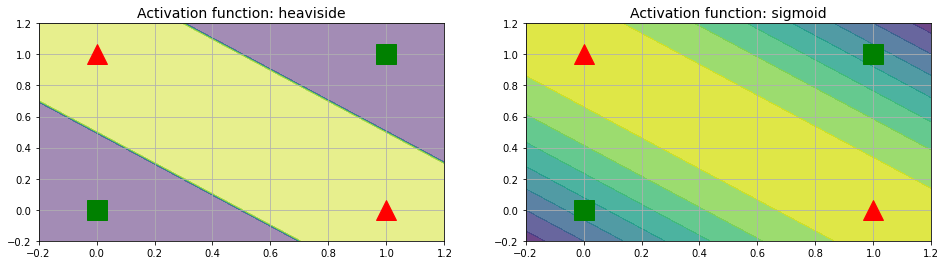

In [7]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.contourf(x1, x2, z1, alpha =.5)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "r^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2, alpha=.8)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "r^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Image Classifier by Keras

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
fashion_mnist = keras.datasets.fashion_mnist  # Using Keras to load the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 

In [10]:
X_train_full.shape # every image is represented as a 28 × 28 array

(60000, 28, 28)

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

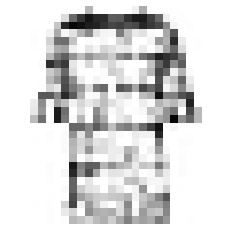

In [12]:
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

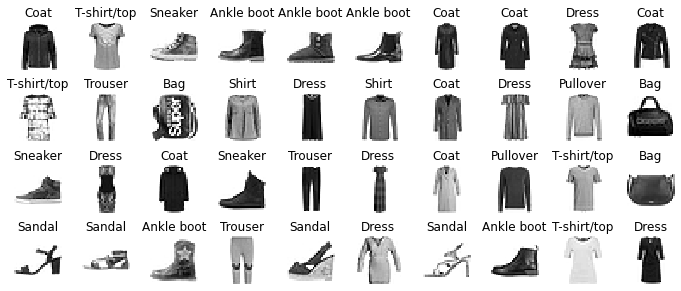

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [15]:
# Here is a classification MLP with two hidden layers
model = keras.models.Sequential()  # creates a Sequential model. 
# This is the simpest kind of Keras model for NN that are just composed of a single stack of layers connected sequentually.
# This is called Sequential API
model.add(keras.layers.Flatten(input_shape=[28, 28])) # the first layer whose role is to convert each input image into a 1D array
# it computes X.reshape(-1,1)
model.add(keras.layers.Dense(300, activation="relu")) # Dense hidden layer with 300 neurons. 
# It uses It will use the ReLU activation function. 
# Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs
model.add(keras.layers.Dense(100, activation="relu")) # Second Dense hidden layer with 100 neurons, also using the ReLU activation function
model.add(keras.layers.Dense(10, activation="softmax")) # Dense output layer with 10 neurons (one per class),
# using the softmax activation function (because the classes are exclusive)

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model.summary()

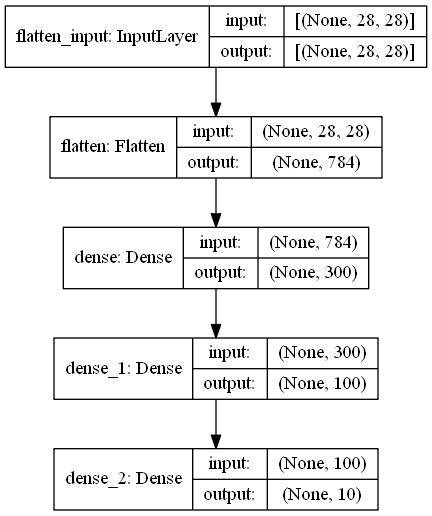

In [20]:
keras.utils.plot_model(model, "fashion_mnist_model.png", show_shapes=True)

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.5341 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4211 - accuracy: 0.8529 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4062 - accuracy: 0.8580 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8671 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3655 - accuracy: 0.8709 - val_loss: 0.3623 - val_accuracy:

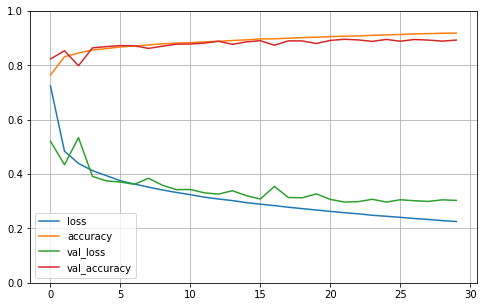

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8827


[0.33773481845855713, 0.8827000260353088]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

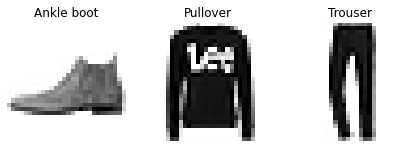

In [31]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test= train_test_split(housing.data, housing.target, random_state =42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [36]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation ="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr = 1e-3))
history = model.fit(X_train, y_train, epochs =20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 958us/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 956us/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 892us/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 931us/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 899us/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 977us/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 949us/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 911us/step - loss: 0.4910 - 

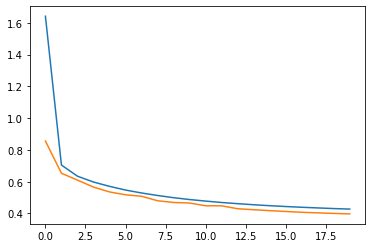

In [38]:
plt.plot(pd.DataFrame(history.history))
plt.show()

In [47]:
# Functional API
np.random.seed(42)
tf.random.set_seed(42)
input_   = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation ="relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat  = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model  = keras.models.Model(inputs =[input_], outputs = [output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_14[0][0]               

In [53]:
model.compile(loss = "mean_squared_error", optimizer= keras.optimizers.SGD(lr = 1e-3))
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test =  model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4246 - val_loss: 0.3761
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4130 - val_loss: 0.3929
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4128 - val_loss: 0.3735
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4106 - val_loss: 0.3707
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4030 - val_loss: 0.3687
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3961 - val_loss: 0.3750
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4063 - val_loss: 0.3629
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3957 - val_loss: 0.3632
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3869 - val_loss: 0.3642
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3873 - val_loss: 0.3608

In [61]:
# Multiple inputs
input_A = keras.layers.Input(shape =[5], name = "wide_input")
input_B = keras.layers. Input(shape =[6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation ="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model  = keras.models.Model(inputs =[input_A, input_B], outputs = [output])
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs =20, validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.9772 - val_loss: 1.0307
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8977 - val_loss: 0.7254
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7257 - val_loss: 0.6711
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6720 - val_loss: 0.6088
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6210 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5864 - val_loss: 0.5466
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5784 - val_loss: 0.5386
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5411 - val_loss: 0.4899
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5132 - val_loss: 0.4683
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4916 - val_loss: 0.4651

In [64]:
# Adding and auxiliary output for regularization:
np.random.seed(42)
tf.random.set_seed(42)
nput_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name ="aux_output")(hidden2)
model = keras.models.Model(inputs =[input_A, input_B], outputs = [output, aux_output])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 30)           930         dense_26[0][0]                   
____________________________________________________________________________________________

In [65]:
model.compile(loss =["mse", "mse"], loss_weights =[.9, .1],optimizer = keras.optimizers.SGD(lr= 1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 20,
                   validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))
              

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.4633 - main_output_loss: 3.3289 - aux_output_loss: 4.6732 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9807 - main_output_loss: 0.7503 - aux_output_loss: 3.0537 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7742 - main_output_loss: 0.6290 - aux_output_loss: 2.0810 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6952 - main_output_loss: 0.5897 - aux_output_loss: 1.6449 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6469 - main_output_loss: 0.5508 - aux_output_loss: 1.5118 - val_loss

In [66]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 925us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


In [ ]:
# The subclassing API
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [72]:
model = WideAndDeepModel(30, activation="relu")
model.compile(loss ="mse", loss_weights = [.9, .1], optimizer = keras.optimizers.SGD(lr =1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs =10,
                   validation_data = ((X_valid_A, X_valid_B),(y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.1953 - output_1_loss: 3.1220 - output_2_loss: 3.8547 - val_loss: 2.8539 - val_output_1_loss: 2.5208 - val_output_2_loss: 5.8515
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 1.0355 - output_1_loss: 0.8893 - output_2_loss: 2.3515 - val_loss: 1.5743 - val_output_1_loss: 1.2249 - val_output_2_loss: 4.7190
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.8118 - output_1_loss: 0.7014 - output_2_loss: 1.8051 - val_loss: 1.1348 - val_output_1_loss: 0.8106 - val_output_2_loss: 4.0528
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7258 - output_1_loss: 0.6371 - output_2_loss: 1.5243 - val_loss: 0.9375 - val_output_1_loss: 0.6529 - val_output_2_loss: 3.4992
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6637 - output_1_loss: 0.5831 - output_2_loss: 1.3885 - val_loss: 0.7974 - val_output_1_loss: 0.5528 - val_ou

In [76]:
# Saving and Restoring
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation ="relu", input_shape = [8]),
    keras.layers.Dense(30, activation ="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr = 1e-3))
history = model.fit(X_train, y_train, epochs =10, validation_data = (X_train, y_train))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.3697 - val_loss: 0.7328
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6964 - val_loss: 0.6131
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6167 - val_loss: 0.5704
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5402
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - val_loss: 0.5134
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4923
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - val_loss: 0.4759
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4634
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4627 - val_loss: 0.4514
Epoch 10/10
162/162 [==============================] - 0s 615us/step - loss: 0.4382


In [77]:
model.save("keras_model.h5")

In [78]:
model = keras.models.load_model("keras_model.h5")

In [79]:
model.predict(X_new)

array([[0.5400236],
       [1.6505969],
       [3.0098243]], dtype=float32)

In [80]:
model.save_weights("keras_weights.ckpt")

In [81]:
model.load_weights("keras_weights.ckpt")

# Using Callbacks during Training

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation ="relu"),
    keras.layers.Dense(1)
])
model.compile(loss ="mse", optimizer = keras.optimizers.SGD(lr =1e-2))
checkpoint = keras.callbacks.ModelCheckpoint("keras_model.h5", save_best_only = True)
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid),
                   callbacks =[checkpoint])
model = keras.models.load_model("keras_model.h5") 
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.1971 - val_loss: 0.7166
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4672 - val_loss: 1.6898
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4524 - val_loss: 2.8628
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4025 - val_loss: 2.1929
Epoch 5/10
363/363 [==============================] - 0s 959us/step - loss: 0.3810 - val_loss: 1.3409
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3784 - val_loss: 0.3605
Epoch 7/10
363/363 [==============================] - 0s 999us/step - loss: 0.3808 - val_loss: 0.3711
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3627 - val_loss: 0.3586
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3480 - val_loss: 0.3573
Epoch 10/10
162/162 [==============================] - 0s 627us/step - loss: 0.3497


In [83]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [84]:
val_train_ratio = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs =1,
                   validation_data = (X_valid, y_valid),
                   callbacks = [val_train_ratio])

363/363 [==============================] - 1s 1ms/step - loss: 0.3436 - val_loss: 0.3452

val/train: 1.00


# Hyperparameter Tuning

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden =1, n_neurons =30, learning_rate = 1e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation ="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse", optimizer = optimizer)
    return model

In [88]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 2.8591 - val_loss: 3.8361
Epoch 2/100
363/363 [==============================] - 0s 898us/step - loss: 0.9571 - val_loss: 1.6986
Epoch 3/100
363/363 [==============================] - 0s 970us/step - loss: 0.7304 - val_loss: 0.8313
Epoch 4/100
363/363 [==============================] - 0s 890us/step - loss: 0.6636 - val_loss: 0.6322
Epoch 5/100
363/363 [==============================] - 0s 939us/step - loss: 0.6046 - val_loss: 0.5551
Epoch 6/100
363/363 [==============================] - 0s 927us/step - loss: 0.5775 - val_loss: 0.5281
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5654 - val_loss: 0.5205
Epoch 8/100
363/363 [==============================] - 0s 901us/step - loss: 0.5299 - val_loss: 0.5021
Epoch 9/100
363/363 [==============================] - 0s 972us/step - loss: 0.5103 - val_loss: 0.4928
Epoch 10/100
363/363 [==============================] - 0s 930us/step - loss:

In [89]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 652us/step - loss: 0.3918


In [90]:
y_pred = keras_reg.predict(X_new)

In [92]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [0,1,2,3], 
    "n_neurons" : np.arange(1,100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 1ms/step - loss: 1.8152 - val_loss: 0.4824
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5119 - val_loss: 0.4416
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4653 - val_loss: 0.4062
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4519 - val_loss: 0.3955
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4214 - val_loss: 0.3923
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4112 - val_loss: 0.3937
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4250 - val_loss: 0.3907
Epoch 8/100
242/242 [==============================] - 0s 958us/step - loss: 0.4162 - val_loss: 0.3883
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4001 - val_loss: 0.4045
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4127 - val_loss: 0.4035

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


242/242 [==============================] - 0s 1ms/step - loss: 2.0996 - val_loss: 3.5294
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7145 - val_loss: 9.1214
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5301 - val_loss: 5.7477
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4569 - val_loss: 2.8402
Epoch 5/100
242/242 [==============================] - 0s 999us/step - loss: 0.4300 - val_loss: 1.2158
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4110 - val_loss: 0.6344
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3935 - val_loss: 0.5178
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3964 - val_loss: 0.4809
Epoch 9/100
242/242 [==============================] - 0s 956us/step - loss: 0.3924 - val_loss: 0.4381
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3993 - val_loss: 0.42

242/242 [==============================] - 0s 2ms/step - loss: 0.5991 - val_loss: 0.6249
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4260 - val_loss: 0.6239
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4057 - val_loss: 0.4441
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3792 - val_loss: 0.4373
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3775 - val_loss: 0.3594
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3952 - val_loss: 0.3758
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3729 - val_loss: 0.3990
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3702 - val_loss: 0.3626
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3804 - val_loss: 0.4742
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3544 - val_loss: 0.3409

121/121 [==============================] - 0s 617us/step - loss: 0.4167
[CV]  n_neurons=51, n_hidden=1, learning_rate=0.00037078874137762145, total=  28.2s
[CV] n_neurons=51, n_hidden=1, learning_rate=0.00037078874137762145 ..
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 5.5093 - val_loss: 19.6537
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.7776 - val_loss: 25.8912
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.7242 - val_loss: 27.3574
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2686 - val_loss: 25.6089
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0222 - val_loss: 22.4056
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8897 - val_loss: 18.9420
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8281 - val_loss: 15.6210
Epoch 8/100
242/242 [==============================] - 0s 1

242/242 [==============================] - 0s 1ms/step - loss: 0.4851 - val_loss: 0.4630
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4762 - val_loss: 0.4595
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4966 - val_loss: 0.4572
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4734 - val_loss: 0.4542
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4855 - val_loss: 0.4521
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4604 - val_loss: 0.4497
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4856 - val_loss: 0.4471
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4601 - val_loss: 0.4450
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4648 - val_loss: 0.4430
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4629 - val_loss: 

121/121 [==============================] - 0s 692us/step - loss: 1025298.4375
[CV]  n_neurons=40, n_hidden=0, learning_rate=0.01824796188192035, total=   4.1s
[CV] n_neurons=40, n_hidden=0, learning_rate=0.01824796188192035 .....
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.1096 - val_loss: 7.6721
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5463 - val_loss: 21.2001
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5320 - val_loss: 25.0030
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5089 - val_loss: 22.6897
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5096 - val_loss: 22.0189
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5093 - val_loss: 21.3547
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4936 - val_loss: 19.9381
Epoch 8/100
242/242 [==============================] - 0s

242/242 [==============================] - 0s 1ms/step - loss: 0.7418 - val_loss: 6.7800
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6810 - val_loss: 4.8893
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6207 - val_loss: 6.2920
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5858 - val_loss: 3.0349
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5840 - val_loss: 2.1209
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5254 - val_loss: 1.0339
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4985 - val_loss: 0.9105
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4703 - val_loss: 0.4524
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4647 - val_loss: 0.5043
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4453 - val_loss: 0.4238


242/242 [==============================] - 0s 1ms/step - loss: 0.3455 - val_loss: 0.4594
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3363 - val_loss: 0.3723
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3417 - val_loss: 0.4459
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3253 - val_loss: 0.3326
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3128 - val_loss: 0.3576
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3363 - val_loss: 0.4330
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3262 - val_loss: 0.3535
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3192 - val_loss: 0.3956
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3163 - val_loss: 0.3679
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3263 - val_loss: 0

242/242 [==============================] - 0s 1ms/step - loss: 0.2889 - val_loss: 0.2973
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2888 - val_loss: 0.3633
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2783 - val_loss: 0.3898
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2974 - val_loss: 0.4072
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2852 - val_loss: 0.3044
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2687 - val_loss: 0.3433
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2791 - val_loss: 0.2936
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2795 - val_loss: 0.3071
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2822 - val_loss: 0.2960
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2777 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3663 - val_loss: 1.0078
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3685 - val_loss: 0.9318
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3672 - val_loss: 1.0321
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3499 - val_loss: 1.1552
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3462 - val_loss: 1.2980
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3370 - val_loss: 1.3160
Epoch 15/100
121/121 [==============================] - 0s 608us/step - loss: 0.3746
[CV]  n_neurons=59, n_hidden=2, learning_rate=0.004591455636549438, total=   4.7s
[CV] n_neurons=59, n_hidden=2, learning_rate=0.004591455636549438 ....
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.8879 - val_loss: 6.6400
Epoch 2/100
242/242 [==============================] - 0s 1ms/

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.5min finished


363/363 [==============================] - 1s 1ms/step - loss: 1.3892 - val_loss: 1.8998
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5241 - val_loss: 0.8918
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4073 - val_loss: 0.3890
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3782 - val_loss: 0.3702
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3683 - val_loss: 0.3430
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3554 - val_loss: 0.3670
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3640 - val_loss: 0.3509
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3493 - val_loss: 0.3324
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3341 - val_loss: 0.3311
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3361 - val_loss: 0.4099
E

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000024FC12C44C8>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302...
                                                          0.005021425736625637,
                                                  

In [93]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}